# Isolating_singularities
This module contains the implementation of the algorithms 
introduced in [HAL](https://hal.archives-ouvertes.fr/hal-02612412). It basically concerns isolating the singularities of the  plane   projection of a generic curve embedded in $\mathbb{R}^n$.
## Main functions
In the following, by an interval we mean a list $[a,b]$ of floats $a,b$ that represent the lower and upper bounds respectively. By a box we mean a list of intervals. 
### 1) enclosing\_boxes(system , Box , X , eps=0.1)
This function returns a list of two lists: The first one is a list of boxes in $\mathbb{R}^n$ that cover a smooth part of the curve (more precisely, where the used solver [IbexSolve](http://www.ibex-lib.org/doc/solver.html) succeeds to certify the smoothness). The second one contains boxes where the used solver ([IbexSolve](http://www.ibex-lib.org/doc/solver.html)) fails to certify the smoothness of the curve.
####  Parameters
##### system
 A string that is the name of the txt file which contains the equations that define the curve.
####  Box
A box that contains the curve 
### X
A list of the sympy symbols that appear in the equations of system.
### eps_min
Minimal width of output boxes. This is a criterion to stop bisection: a non-validated box will not be larger than ‘eps-min’. Default value is 1e-3.
### eps_max 
Maximal width of output boxes. This is a criterion to force bisection: a validated box will not be larger than ‘eps-max’ (unless there is no equality and it is fully inside inequalities). Default value is 1e-1.

###  Example 

In [1]:
import Isolating_singularities as isos
import sympy as sp


##################################
#Creating the system file #######
##################################
#The user can creat the txt file manualy where every
#line represents an equation that defines the curve. 
#However, the following code is to creat the system 
#file using Python.

fil=open("system.txt","w")
fil.write("(x1 - 8*cos(x3))^2 + (x2 - 8*sin(x3) )^2 - 23 \n")
fil.write("(x1 - 9 - 5* cos(x4) )^2 + (x2 - 5* sin(x4))^2 - 60 \n")
fil.write( "(2*x1 - 16*cos(x3))*(2*x2 - 10*sin(x4)) - (2*x2 - 16*sin(x3))*(2*x1 - 10*cos(x4) - 18)")
fil.close()
##################################
#Declaring parameters #######
##################################
System="system.txt" 
Box=[[-5,15],[-15,15],[-3.14,3.14],[-3.14,3.14]]
X=[sp.Symbol("x"+str(i)) for i in range(1,5)]

##################################
#Applying the function #######
##################################
boxes =isos.enclosing_curve(System,Box,X)		
print(len(boxes[0])) #the number of certified boxes
print(len(boxes[1])) #the number of unknown boxes

[]
2745
0



###  ploting_boxes(certified_boxes, uncer_boxes, var=[0,1], B=[ [-20,20] , [-20,20] ], a=1, b=10, nodes= [], cusps=[ ] )

This function plots a plane projection of $enclosing_curve$ output. 
####  Parameters 
##### certified_boxes 
A list of boxes that cover a smooth part of the curve certified by [IbexSolve](http://www.ibex-lib.org/doc/solver.html). The function plots the plane projection of this list in green.
##### uncer_boxes
A list of boxes that cover the part of the curve where [IbexSolve](http://www.ibex-lib.org/doc/solver.html) fails to certify the smoothness. The function plots the plane projection of this list in red.
##### var (optional)
A list of two integers that determines the variables for which the plane projection is considered.By default, the function considers the first two variables.
##### B (optional)
Determines the domain of the graph. By defult, it is set to be $[-20,20]^2$.
##### nodes (optional)
A set of boxes each of which contains a node (to be computed later)
##### cusps (optional)
A set of boxes each of which contains a cusp (to be computed later)
###  Example 
The plane projection with respect to $x_1$ and $x_2$.

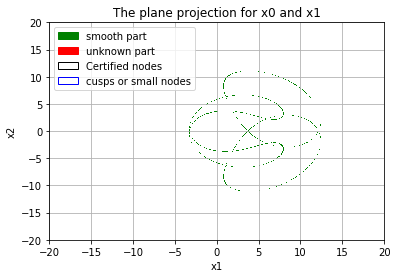

In [2]:
isos.ploting_boxes(boxes[0],boxes[1])
# boxes if the output of enclosing_curve

The plane projection with respect to $x_3$ and $x_4$.

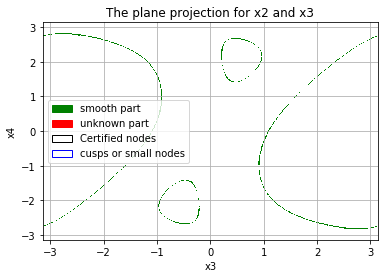

In [3]:
isos.ploting_boxes(boxes[0],boxes[1],\
        var=[2,3],B=[[-3.14,3.14],[-3.14,3.14]])

### enclosing_singularities (System, boxes , Box , X, eps=0.1)
This function returns a set of two sets. The first one contains 2d boxes each of which contains exactly one node of the plane projection (with respect to the first two variables).
The second one is a list of boxes such that every box contains either one ordinary cusp or a node that is a projection of two branches closed to each other. 
####  Parameters  
**System,  Box, X**,  **eps_min**  and **eps_max** are as in  $enclosing\_curve$.

**boxes** is the output of $enclosing\_curve$.

**threshold**
    A parameter that determines when to use Taylor form instead of the normal way of comuting the Ball system. This improves the performance when there are nodes that are induced by the projection of too-close branches. The default value us 1e-2.



####  Example
 In the following, $nodes$ contains boxes each of which has a solution of Ball with $t \neq 0$. $nodes\_or\_cusps$  contains boxes each of which has a solution of Ball with $t = 0$.

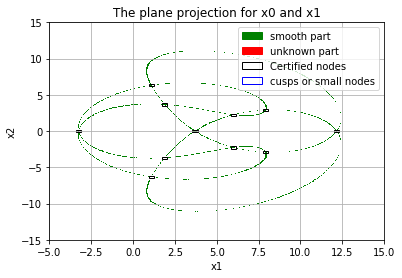

In [4]:

nodes, nodes_or_cusps=isos.enclosing_singularities(System,boxes,Box,X)

#plotting the singularities
isos.ploting_boxes(boxes[0],boxes[1],B=[[-5,15],[-15,15]]\
                  ,nodes=nodes, cusps=nodes_or_cusps)
